# Multiple Linear Regression

In this notebook, we'll build a linear regression model to predict `demand` using an appropriate predictor variable for bikes

The steps we will follow in this excercise are as follows:

1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set

## 1. Reading and understanding the Data
Let's start with the following steps:

- Importing data using the pandas library
- Understanding the structure of the data

In [144]:
import warnings
warnings.filterwarnings('ignore')

In [201]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [146]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [147]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [148]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [149]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [150]:
bike.shape

(730, 16)

In [151]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# removing columns 
**instant** - its only index values hence we can remove it 

**dteday** - removing it as we already have year column 

**registered** & **casual** - removing it , as the target variable is going to be cnt

In [152]:
bike = bike.drop(columns=["instant", "dteday", "registered", "casual"])

In [153]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [154]:
# checking numerical variables
bike[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


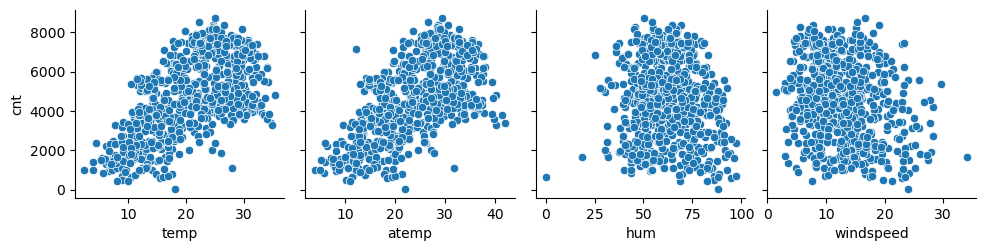

In [155]:
#scatter plot 

sns.pairplot(x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt', data = bike)

- it can be observed that number of rental increases in a similar manner for Temp and atemp (Which is feeling temperature )
- both temp and atemp have similar trends


In [156]:
#outliers in hum
bike = bike.drop(index = bike[(bike['hum'] < 20)].index)

#outliers in windspeed
bike = bike.drop(index = bike[(bike['windspeed'] > 30)].index)

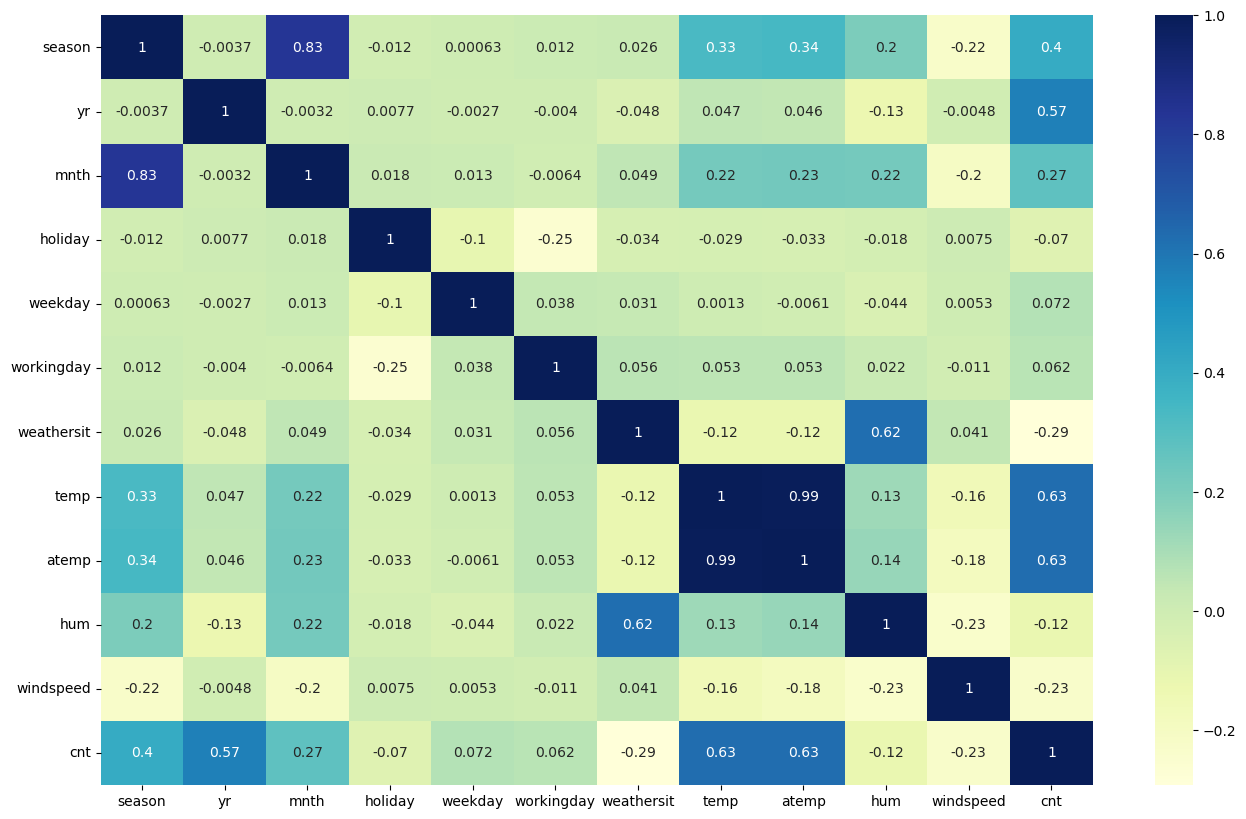

In [157]:
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### high coorelation are between: 
- temp and atemp
- mnth and season 
- cnt and temp
- cnt and atemp
- hum and weathersit
- cnt and yr



In [158]:
#since the coorelation between temp and atemp is almost 0.99 ~ 1 we can drop one of them 

# dropping atemp
bike = bike.drop(columns=['atemp'])

In [159]:
bike[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.125376,-0.156453
hum,0.125376,1.000000,-0.233014
windspeed,-0.156453,-0.233014,1.000000


### Visualizing Categorical Variables

In [160]:
bike[['season','weathersit','mnth']] = bike[['season','weathersit','mnth']].astype('category')

In [161]:
# Replacing numbers with labels 
season_new = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_new = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_new = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_new = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

# replacing columnn values with names
bike['season'] = bike['season'].replace(season_new)
bike['mnth'] = bike['mnth'].replace(mnth_new)
bike['weekday'] = bike['weekday'].replace(weekday_new)
bike['weathersit'] = bike['weathersit'].replace(weathersit_new)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


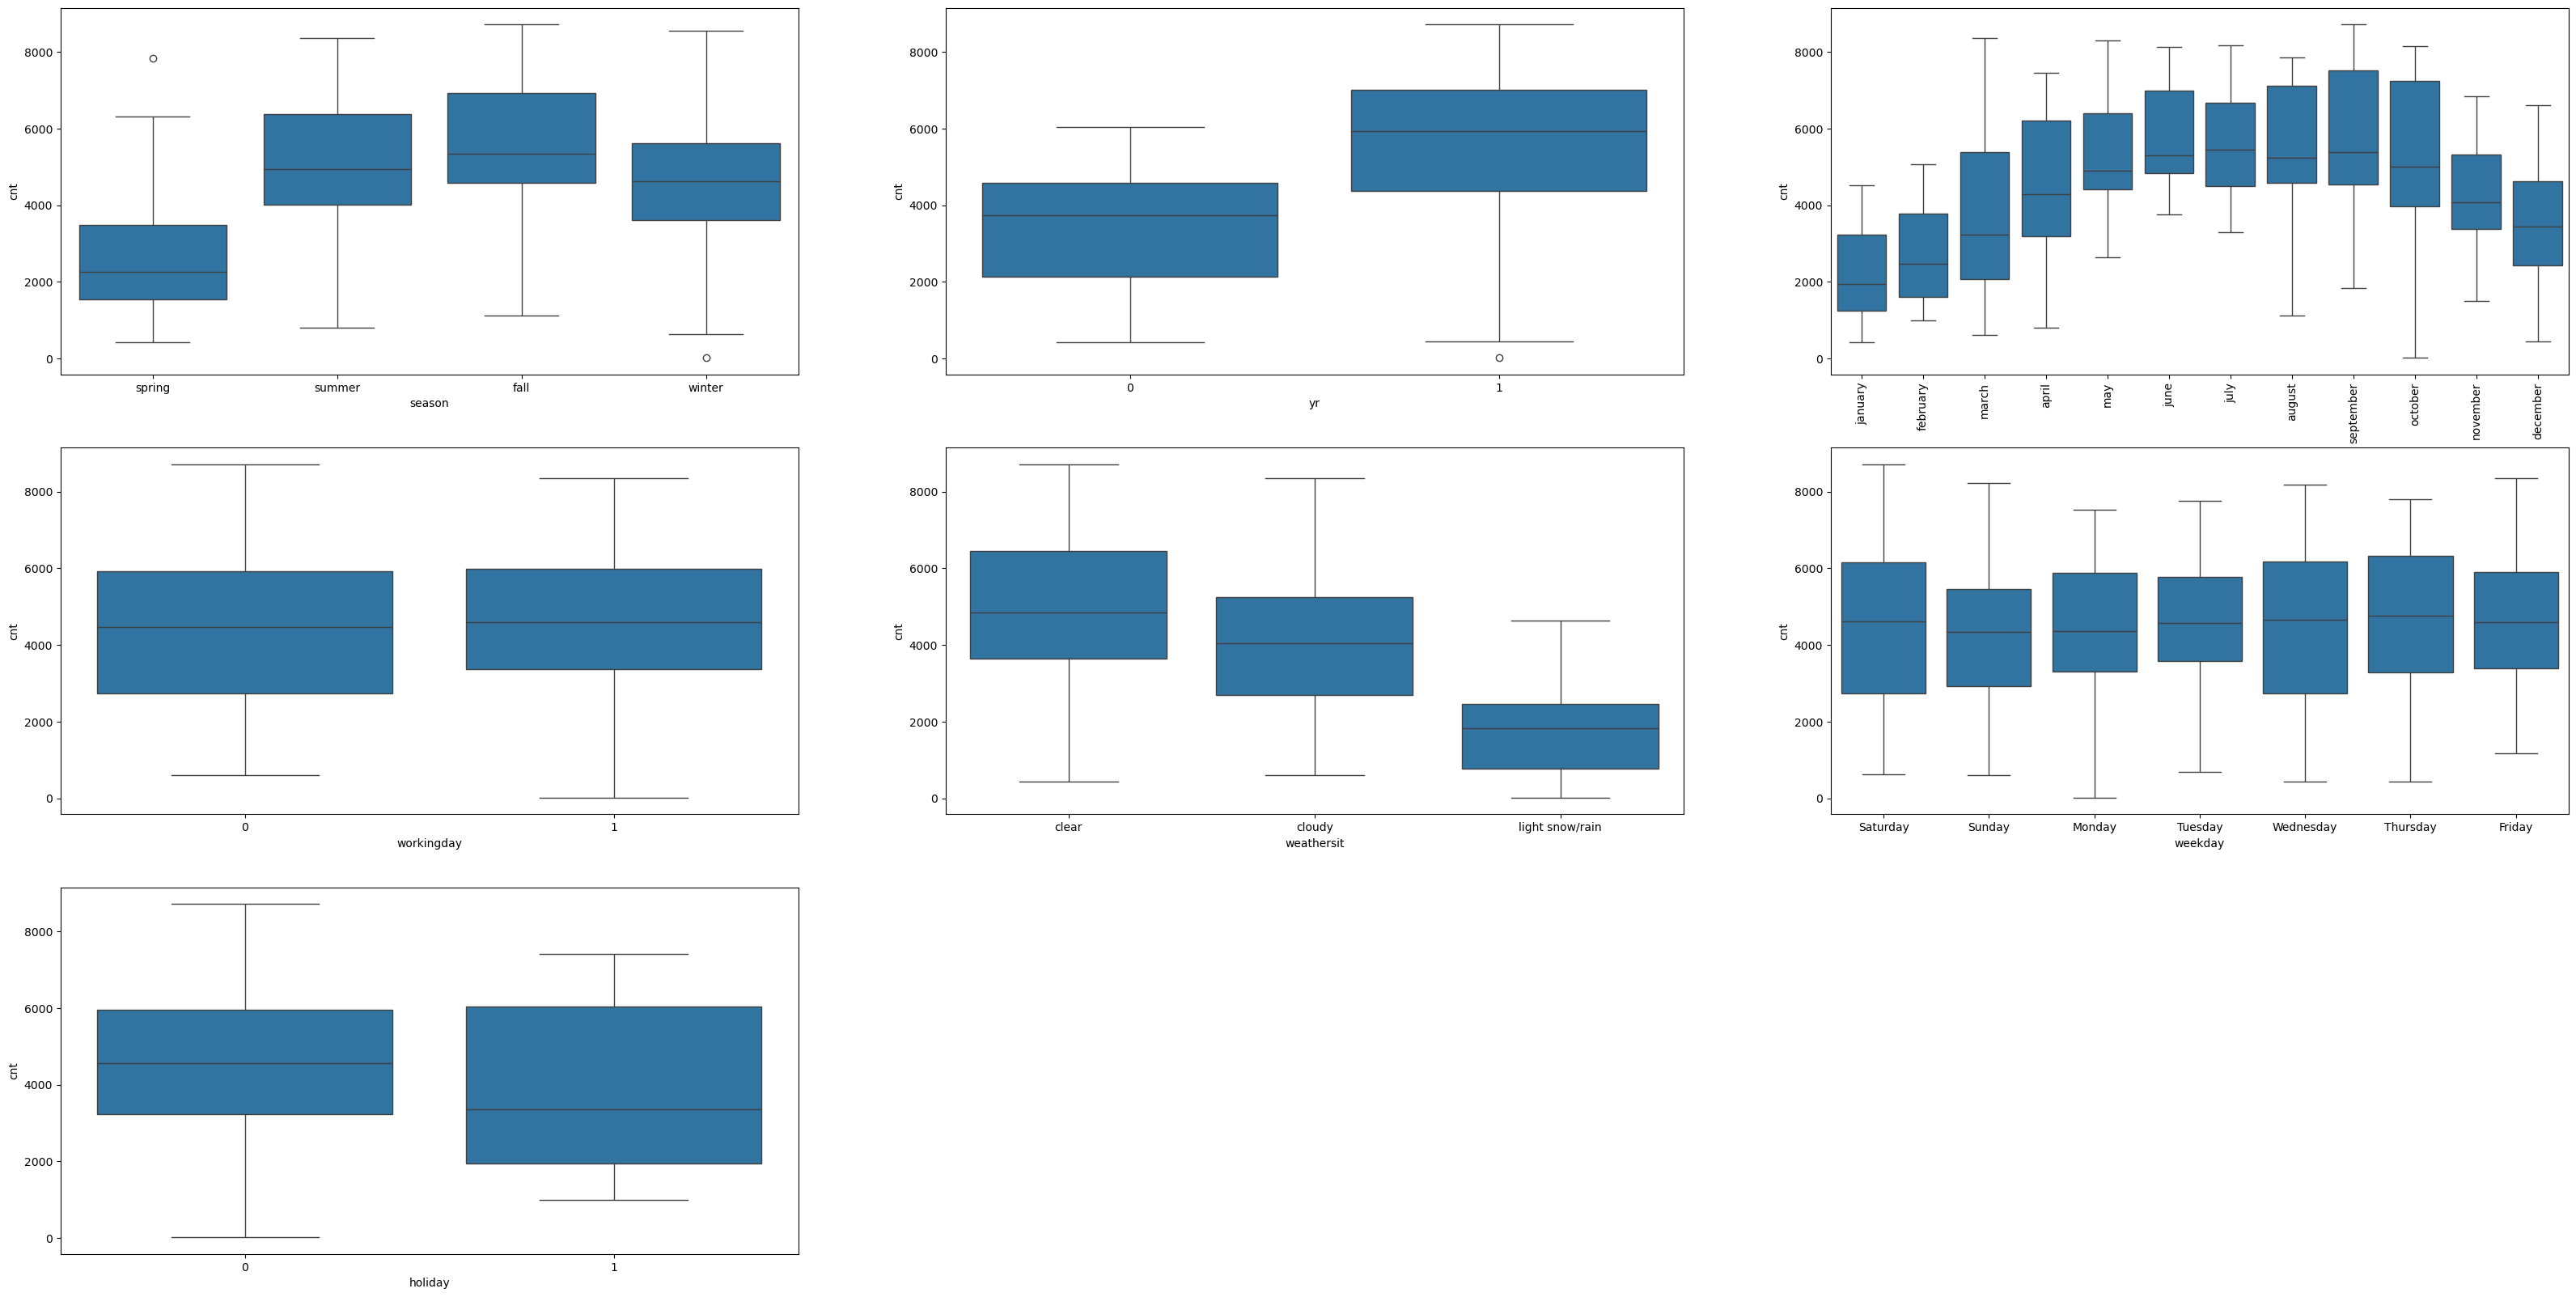

In [162]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(40, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.xticks(rotation=90)  # Rotate x-axis labels for mnth
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

## 2. Preparing the data for modelling

In [163]:
# creating dummy variable for categorical data

season_variable = pd.get_dummies(bike['season'],drop_first=True)
mnth_variable = pd.get_dummies(bike['mnth'],drop_first=True)
weekday_variable = pd.get_dummies(bike['weekday'],drop_first=True)
weathersit_variable = pd.get_dummies(bike['weathersit'],drop_first=True)


In [164]:
# adding indicator variable columns to the dataset . Dropping original columns

bike = pd.concat([bike,season_variable,mnth_variable,weekday_variable,weathersit_variable],axis=1)
bike = bike.drop(columns=['season','mnth','weekday','weathersit'])

In [165]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [166]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'february', 'march', 'april', 'may', 'june',
       'july', 'august', 'september', 'october', 'november', 'december',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'cloudy', 'light snow/rain'],
      dtype='object')

In [167]:
# Get a list of columns containing only True/False values
boolean_columns = [col for col in bike.columns if bike[col].dtype == 'bool']

# Convert True/False values to 0 and 1
for col in boolean_columns:
    bike[col] = bike[col].astype(int)

In [168]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [169]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               728 non-null    int64  
 1   holiday          728 non-null    int64  
 2   workingday       728 non-null    int64  
 3   temp             728 non-null    float64
 4   hum              728 non-null    float64
 5   windspeed        728 non-null    float64
 6   cnt              728 non-null    int64  
 7   summer           728 non-null    int32  
 8   fall             728 non-null    int32  
 9   winter           728 non-null    int32  
 10  february         728 non-null    int32  
 11  march            728 non-null    int32  
 12  april            728 non-null    int32  
 13  may              728 non-null    int32  
 14  june             728 non-null    int32  
 15  july             728 non-null    int32  
 16  august           728 non-null    int32  
 17  september        728 

In [170]:
#Now data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [171]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,0,...,0,1,0,0,1,0,0,0,0,0
481,1,0,1,18.757500,40.0833,23.291411,6233,1,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,23.848347,81.0833,12.875725,4191,1,0,0,...,0,0,0,0,1,0,0,0,1,0
629,1,0,0,26.650000,64.6667,19.000061,8395,0,1,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [172]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
241,0,0,1,26.205847,54.8333,8.375536,5204,0,1,0,...,0,0,0,0,0,0,1,0,0,0
496,1,0,0,23.130847,48.0417,8.249911,7429,1,0,0,...,0,0,0,1,0,0,0,0,0,0
449,1,0,1,18.279153,47.7917,25.917007,5558,1,0,0,...,0,0,1,0,0,0,0,0,0,0
594,1,0,0,27.811653,60.3333,11.917089,7865,0,1,0,...,0,0,0,1,0,0,0,0,0,0
151,0,0,1,31.330847,67.7083,13.875164,3974,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [173]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'february', 'march', 'april', 'may', 'june',
       'july', 'august', 'september', 'october', 'november', 'december',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'cloudy', 'light snow/rain'],
      dtype='object')

In [174]:
print(bike_train.shape)
print(bike_test.shape)

(509, 29)
(219, 29)


In [175]:


# 1. Instantiate an object 
numerical_scaler = MinMaxScaler()

#create a list of numeric vars 
num_vars = ['temp','hum','windspeed']

#2. Fit on data
numerical_scaler.fit(bike_train[num_vars])
bike_train[num_vars] = numerical_scaler.transform(bike_train[num_vars])

## 3. Training the Model

In [176]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [177]:
y_train.head()

728    1796
481    6233
113    4191
629    8395
535    6211
Name: cnt, dtype: int64

In [178]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,february,...,november,december,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
728,1,0,0,0.245101,0.319025,0.772556,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
481,1,0,1,0.496388,0.204176,0.764739,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0.651106,0.774941,0.375373,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
629,1,0,0,0.736253,0.546404,0.604317,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.470417,0.179101,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [179]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'september', 'october', 'november', 'december', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'cloudy',
       'light snow/rain'],
      dtype='object')


### Recursive feature elimination:

We will be using RFE and will be choosing best columns and then p-value method for elimination

In [180]:
lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [181]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
16,1,True,september
15,1,True,august
26,1,True,cloudy
12,1,True,may
11,1,True,april
10,1,True,march
8,1,True,winter
13,1,True,june
27,1,True,light snow/rain


In [182]:
# Selected col
selected_col = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_col

array(['yr', 'september', 'august', 'cloudy', 'may', 'april', 'march',
       'winter', 'june', 'light snow/rain', 'summer', 'windspeed', 'hum',
       'temp', 'fall'], dtype=object)

## Elimination

In [183]:
# Following a stepwise elimination

def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

### Model 1 
using selected col by RFE - 'yr', 'september', 'august', 'cloudy', 'may', 'april', 'march',
       'winter', 'june', 'light snow/rain', 'summer', 'windspeed', 'hum',
       'temp', 'fall'

In [184]:
model_1 = selected_col
ols_fit(y_train, X_train[model_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          1.08e-188
Time:                        22:36:46   Log-Likelihood:                -4102.3
No. Observations:                 509   AIC:                             8237.
Df Residuals:                     493   BIC:                             8304.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1564.7941    181.535     

### Model 2 
- Dropping `april`

In [185]:
del_feature = 'april'
selected_col = selected_col[selected_col!=del_feature]
ols_fit(y_train,X_train[selected_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.5
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          3.14e-189
Time:                        22:43:11   Log-Likelihood:                -4103.7
No. Observations:                 509   AIC:                             8237.
Df Residuals:                     494   BIC:                             8301.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1573.1131    181.806     

### Model 3

Dropping `june`

In [186]:

del_feature = 'june'
selected_col = selected_col[selected_col!=del_feature]
ols_fit(y_train,X_train[selected_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          9.20e-190
Time:                        22:44:32   Log-Likelihood:                -4105.2
No. Observations:                 509   AIC:                             8238.
Df Residuals:                     495   BIC:                             8298.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1547.1048    181.522     

### Using VIF 

In [187]:
vif(X_train[selected_col])

              index        vif
0             const  27.511272
13             fall   6.229382
12             temp   3.595102
9            summer   2.827703
11              hum   2.203655
7            winter   2.129103
4            cloudy   1.684167
3            august   1.655114
5               may   1.599631
8   light snow/rain   1.452447
2         september   1.401030
10        windspeed   1.193865
6             march   1.166809
1                yr   1.056695


### Model 4

Removing `fall` due to high VIF 

In [188]:

del_feature = 'fall'
selected_col = selected_col[selected_col!=del_feature]
ols_fit(y_train,X_train[selected_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.8
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          2.60e-189
Time:                        22:48:08   Log-Likelihood:                -4109.1
No. Observations:                 509   AIC:                             8244.
Df Residuals:                     496   BIC:                             8299.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1538.4120    182.699     

In [189]:
vif(X_train[selected_col])

              index        vif
0             const  27.502973
11              hum   2.149668
9            summer   1.762252
4            cloudy   1.675501
5               may   1.558915
12             temp   1.551816
3            august   1.436710
8   light snow/rain   1.427353
7            winter   1.394656
2         september   1.226279
10        windspeed   1.176055
6             march   1.130929
1                yr   1.043789


- VIF < 5 for selected features. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

### Model 5 
Removing `may`

In [192]:
del_feature = 'may'
selected_col = selected_col[selected_col!=del_feature]
ols_fit(y_train,X_train[selected_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     237.9
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          4.90e-190
Time:                        22:52:11   Log-Likelihood:                -4110.2
No. Observations:                 509   AIC:                             8244.
Df Residuals:                     497   BIC:                             8295.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1501.7906    181.232     

## Final Model 

In [194]:
final_model = ols_fit(y_train,X_train[selected_col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     237.9
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          4.90e-190
Time:                        22:53:58   Log-Likelihood:                -4110.2
No. Observations:                 509   AIC:                             8244.
Df Residuals:                     497   BIC:                             8295.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1501.7906    181.232     

- 11 features have been selected.
- All the features are statistically significant [low p-value]
- The model over is a good fit with Prob (F-statistic): 4.90e-190
- The model explains 83.6% variability in the training data. Adjusted R-square being 84.0%

## 4. Residual Analysis

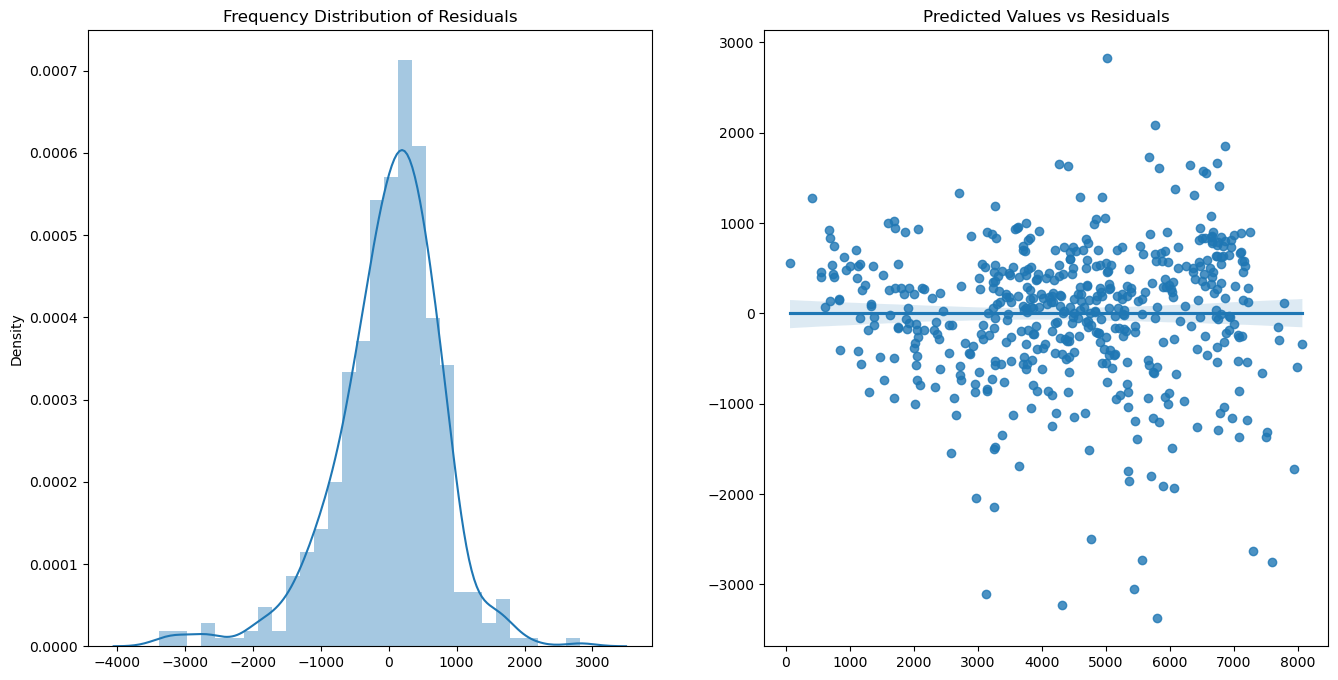

In [197]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_col])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')

sns.regplot(x=y_train_pred, y=y_train - y_train_pred, ax=ax[1])
plt.show()

## 4. Prediction and Evaluation

In [205]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_col]

In [206]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

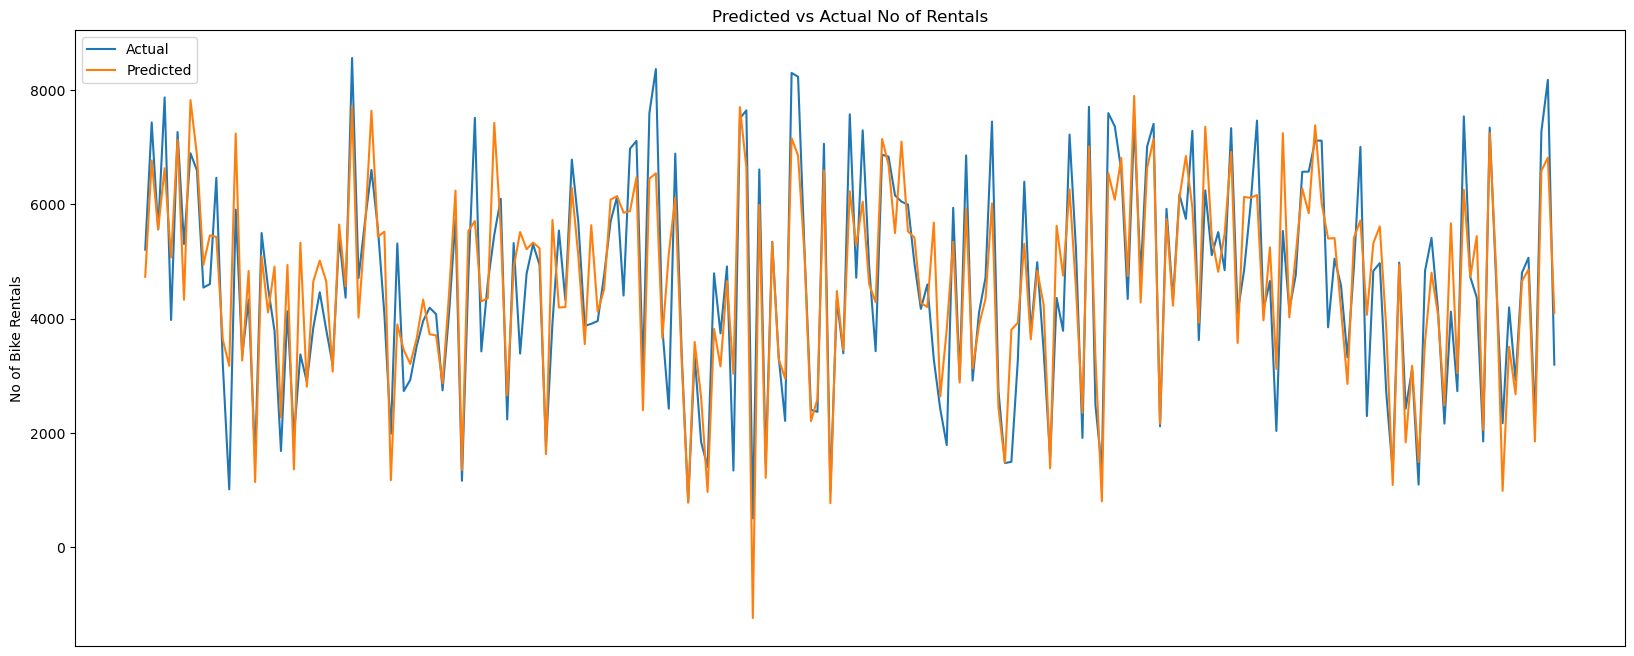

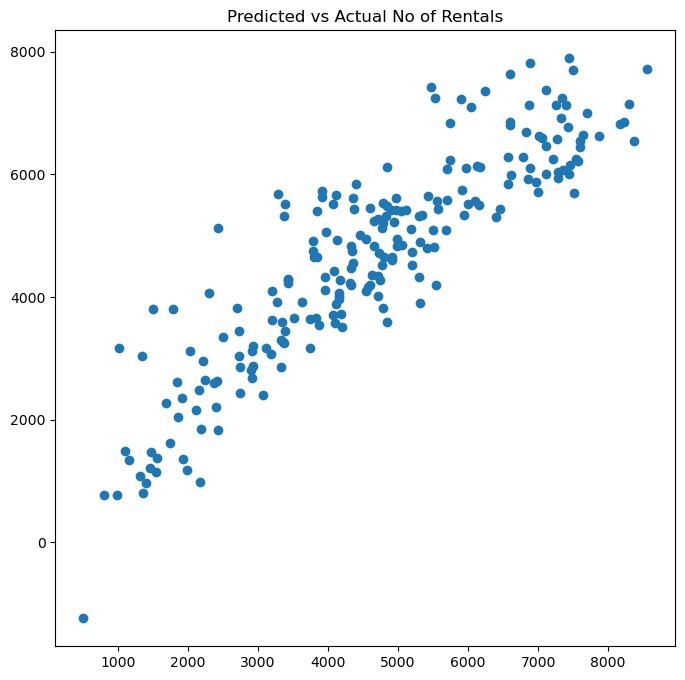

In [207]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

In [208]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.84
R-squared for test data: 0.79
Mean Squared Error 733284.806


In [210]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_col],y_train,cv=10, scoring='r2')
clr

array([0.8134593 , 0.77300909, 0.77386306, 0.8988406 , 0.74075716,
       0.8832966 , 0.75969384, 0.81989329, 0.81781031, 0.91520519])

In [212]:
selected_col

array(['yr', 'september', 'august', 'cloudy', 'march', 'winter',
       'light snow/rain', 'summer', 'windspeed', 'hum', 'temp'],
      dtype=object)

## Features that can be considered

In [215]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = selected_col
scaler = StandardScaler()
data = X_train[selected_col]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [1501.79060941]


,MLR Coefficients
temp,4991.001360
yr,1918.697165
winter,1287.126664
september,1112.686482
summer,879.633740
august,431.820693
march,321.130938
cloudy,-393.385617
windspeed,-1202.224236
hum,-1373.033455


- Checking the values above we can consider that top features influencing the demand are `temp` and then followed by `yr` and `winter`
  

## Conclusion

From the above analysis we can conclude the following :


1. **Positive Impact on Demand**:
   - **Temperature (temp)**: A coefficient of 4991 indicates that as the temperature increases, bike-sharing demand significantly increases. This is likely because pleasant weather encourages outdoor activities.
   - **Year (yr)**: A coefficient of 1918 suggests that with each passing year, demand for bike sharing has increased, possibly due to growing popularity or awareness.
   - **Seasonal Variables**:
     - **Winter (1287)**: Winter shows a positive contribution to demand, likely in regions with mild winters.
     - **September (1112)** and **Summer (879)**: These months/seasons also positively influence bike-sharing demand, consistent with favorable weather conditions.
     - **August (431)** and **March (321)**: Moderate positive influence indicates some seasonal preference for bike sharing.

2. **Negative Impact on Demand**:
   - **Cloudy Days (-393)**: Cloudy weather decreases demand slightly, likely due to a perception of potential rain.
   - **Windspeed (-1202)**: High winds discourage outdoor activities, reducing bike usage.
   - **Humidity (hum: -1373)**: High humidity negatively affects demand, as it might make biking uncomfortable.
   - **Light Snow/Rain (-1802)**: Precipitation significantly decreases demand, likely due to unsafe or unpleasant biking conditions.

### Conclusion:
- Demand for bike sharing increases with favorable weather conditions (e.g., higher temperatures, lower windspeed, and no precipitation) and has grown over time.
- Seasonal preferences are evident, with summer and early autumn showing higher demand.
- Weather factors like wind, humidity, and precipitation negatively impact usage, emphasizing the need for infrastructure or services that address these conditions.

**Practical Implications for Bike Sharing Operators**:

- **Resource Allocation**: Operators should anticipate higher demand during warmer months and allocate resources (bikes, staff, maintenance) accordingly.
Weather Monitoring: Real-time weather monitoring is crucial for anticipating fluctuations in demand and adjusting operations.
Promotional Strategies: Targeted promotions could be used to incentivize usage during periods of lower demand (e.g., discounts on cloudy days or during winter).

- **Infrastructure Planning**: Investments in infrastructure that provides some weather protection (e.g., covered bike stations) could help mitigate the negative impact of adverse weather.
